## 1. Preparation

In [67]:
import pandas as pd
import kagglehub 
import matplotlib.pyplot as plt
import os
import plotly.express as px

In [68]:
# Download latest version
path = kagglehub.dataset_download("kyanyoga/sample-sales-data")

print("Path to dataset files:", path)

Path to dataset files: /home/gitpod/.cache/kagglehub/datasets/kyanyoga/sample-sales-data/versions/1


In [69]:
all_files = os.listdir('/home/gitpod/.cache/kagglehub/datasets/kyanyoga/sample-sales-data/versions/1')
for file in all_files:
    print(file)

sales_data_sample.csv


In [70]:
raw = pd.read_csv(
    '/home/gitpod/.cache/kagglehub/datasets/kyanyoga/sample-sales-data/versions/1/sales_data_sample.csv',
    encoding='latin1'
)

## 2. Explore the data

In [71]:
# Drop unnecessary columns

to_drop = ['ADDRESSLINE1','ADDRESSLINE2','STATE','POSTALCODE','TERRITORY','PHONE','CONTACTLASTNAME','CONTACTFIRSTNAME']
raw = raw.drop(to_drop, axis = 1)

In [72]:
# Change data type of ORDERDATE to datetime type

raw['ORDERDATE'] = pd.to_datetime(raw['ORDERDATE'])

In [73]:
# Summary stats of Quantitative variables

quantitive_vars = ['QUANTITYORDERED','PRICEEACH', 'SALES','MSRP']
describe_quantitive_vars = raw[quantitive_vars].describe()
describe_quantitive_vars.style.background_gradient(cmap = "Blues")

,QUANTITYORDERED,PRICEEACH,SALES,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000
mean,35.092809,83.658544,3553.889072,100.715551
std,9.741443,20.174277,1841.865106,40.187912
min,6.000000,26.880000,482.130000,33.000000
25%,27.000000,68.860000,2203.430000,68.000000
50%,35.000000,95.700000,3184.800000,99.000000
75%,43.000000,100.000000,4508.000000,124.000000
max,97.000000,100.000000,14082.800000,214.000000


## 3. Analyze and Visualize Data

#### ( •̀ ω •́ )y Color Palette

In [74]:
pastel_colors = [
    "#FFB5A7",  # Coral Blush
    "#FCD5CE",  # Peony Pink
    "#F8E1D4",  # Apricot Cream
    "#A5A58D",  # Olive Sage
    "#B5E2FA",  # Sky Mist
    "#99C1B9",  # Mint Grey
    "#E4C1F9",  # Lavender Frost
    "#CBAACB",  # Soft Lilac
    "#FFFFB5",  # Butter Yellow
    "#FFC8DD",  # Rosy Cotton
    "#D8E2DC",  # Feather White
    "#A9DEF9",  # Cool Ice Blue
    "#EDE0D4",  # Oatmilk Beige
    "#DAD7CD",  # Mossy Neutral
    "#BFD8B8",  # Celery Toned
    "#C6DEF1",  # Baby Blue Grey
    "#FFDAC1",  # Peach Puff
    "#F9C6C9",  # Petal Pink
    "#ECD5E3",  # Mauve Mist
    "#C3F0CA",  # Pastel Mint
]

### 3.1. Annual Revenue

In [75]:
# Annual Revenue
annual_revenue = pd.DataFrame(raw.groupby(['YEAR_ID'])['SALES'].sum()).reset_index()
annual_revenue.style.background_gradient(cmap = "Blues")

,YEAR_ID,SALES
0,2003,3516979.540000
1,2004,4724162.600000
2,2005,1791486.710000


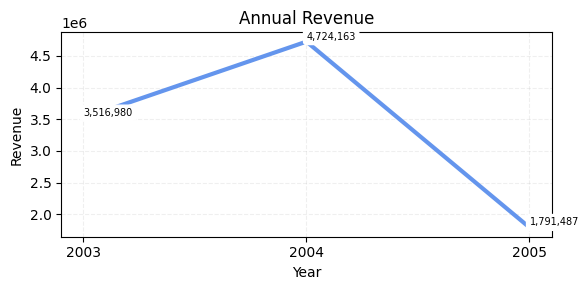

In [76]:
# Plot Chart for Annual Revenue
fig, ax = plt.subplots(figsize=(6, 3))

year = annual_revenue['YEAR_ID'].tolist()
sales = annual_revenue['SALES'].tolist()

plt.plot(
    year, #
    sales, 
    color="#6495ED",
    linewidth = 3
)

for x, y in zip(year, sales):
    plt.text(
        x, y , f'{y:,.0f}', 
        ha='left', 
        va='bottom', 
        fontsize=7,
        bbox=dict(facecolor='white', edgecolor='white', boxstyle='round')
                 )
    
plt.title("Annual Revenue")
plt.xlabel("Year")
plt.ylabel("Revenue")
plt.xticks(year)
plt.grid(True, linestyle='--', alpha=0.2)
plt.tight_layout()
plt.show()


# matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)

### 3.2. Monthly Revenue

In [77]:
# Monthly Revenue
monthly_revenue = pd.DataFrame(raw.groupby(['YEAR_ID','MONTH_ID'])['SALES'].sum()).reset_index()

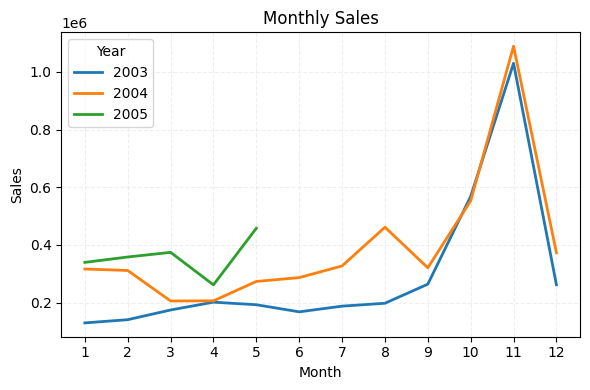

In [78]:

fig, ax = plt.subplots(figsize = (6,4))

for year in monthly_revenue['YEAR_ID'].unique():
    yearly_data = monthly_revenue[monthly_revenue['YEAR_ID'] == year]
    plt.plot(
        yearly_data['MONTH_ID'], 
        yearly_data['SALES'], 
        label=str(year),
        linewidth = 2
    )

plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(range(1, 13)) 
plt.legend(title='Year')
plt.grid(True, linestyle = '--', alpha = 0.2)
plt.tight_layout()

plt.show()

### 3.3. Sales by Country

In [79]:
sales_by_country = pd.DataFrame(raw.groupby(['COUNTRY'])['SALES'].sum()).reset_index()
sales_by_country = sales_by_country.sort_values(by = "SALES", ascending = False)

In [80]:
sales_by_country.reset_index(inplace=True)

In [81]:
sales_by_country = sales_by_country.drop('index',axis=1)

In [82]:
# Create labels of top 5 countries for pie chart

custom_labels = []
for i in range (0,5):
    country = sales_by_country["COUNTRY"][i]
    custom_labels.append(country)
for i in range (5,len(sales_by_country["COUNTRY"])):
    custom_labels.append("")


In [83]:
# Create a function that only show top 5 percentages

def custom_pct(pct):
    idx = custom_pct.idx
    custom_pct.idx += 1
    return f'{pct:.1f}%' if idx < 5 else ''

custom_pct.idx = 0 


In [84]:
# Modify explosion to emphasis top 5 countries

custom_explode = []
for i in range (0,5):
    explode = 0.05
    custom_explode.append(explode)
for i in range (5,len(sales_by_country["COUNTRY"])):
    explode = 0
    custom_explode.append(explode)

In [85]:
custom_explode = tuple(custom_explode)

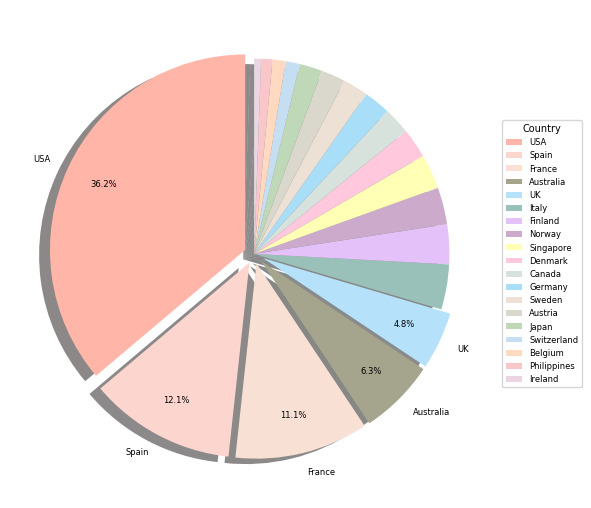

In [86]:
fig, ax = plt.subplots(figsize=(6, 6))
plt.pie(
    sales_by_country["SALES"],
    labels = custom_labels,
    colors = pastel_colors,
    startangle = 90,
    textprops = {'fontsize': 6},
    autopct = custom_pct,
    pctdistance = 0.8,
    explode = custom_explode,
    shadow = {'ox': -0.04, 'edgecolor': 'none', 'shade': 0.9}
)

plt.legend(
    sales_by_country["COUNTRY"],
    title="Country",
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    fontsize=6,
    title_fontsize=7
)

plt.tight_layout()
plt.show()


### 3.4. Average Sales per Order

3.5. New Customers Growth Rate
Clustering with arbitrary number of clusters
Calculating Recency, Frequency and Monetary value for each customer
Calculating RFM Score
Dividing the customers into segments
KMeans Clustering
Data Preprocessing for KMeans
Removing the Skewness for achieving Normal distribution using Log Transformation
Standardizing the variables using Standard Scaler for eual variance and equal mean
Choosing the number of clusters using Elbow Method
Implementing KMeans
Building Customer Personas
Snake Plot
Calculation relative importance of each cluster compared to the population